In [4]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
inline_rc = dict(mpl.rcParams)

In [6]:
os.getcwd()

'C:\\Users\\Marco\\Documents\\CIND 820'

I was curious about the business dataset. I'm tentative to using for my project in some way so I wanted to perform a little bit of EDA with it to understand it a bit more. 

In [8]:
users = []
with open('yelp_academic_dataset_business.json',encoding='utf-8') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        ##if i+1 >= 200000:
            ##break
df = pd.DataFrame(users)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [9]:
filt = (df['state'] == 'ON')

In [10]:
df['city'].value_counts()

Austin         22416
Portland       18203
Vancouver      13330
Atlanta        12612
Orlando        10637
               ...  
Sellwood           1
WESTERVILLE        1
Bayamon            1
Delta Park         1
Portand            1
Name: city, Length: 836, dtype: int64

Text(0.5, 0, 'City')

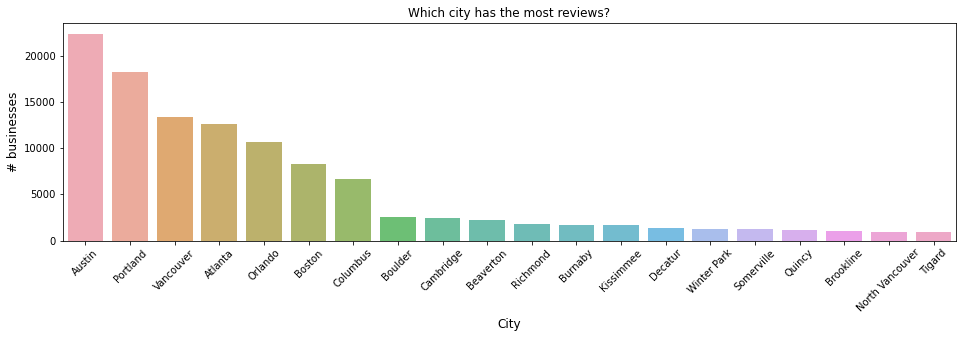

In [11]:
#Get the distribution of the ratings
x=df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

Text(0.5, 0, 'Star Ratings ')

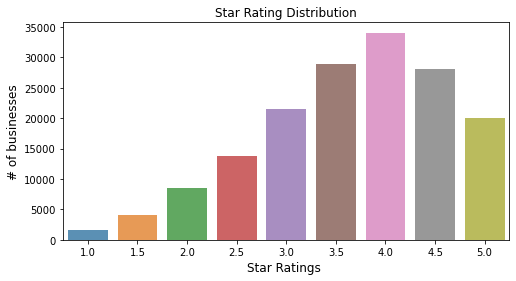

In [12]:
x=df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

In [13]:
x.describe()

count        9.000000
mean     17842.777778
std      11505.294149
min       1686.000000
25%       8523.000000
50%      19953.000000
75%      28072.000000
max      34056.000000
Name: stars, dtype: float64

Since I primarily want to deal with reviews exclusively I wanted to look at these 

In [23]:
reviews = []
with open('yelp_academic_dataset_review.json',encoding='utf-8') as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        #if i+1 >= 200000:
            #break
df_rev = pd.DataFrame(reviews)
df_rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [24]:
review=df_rev[['stars','text']]

review.head()

,stars,text
0,2.0,"As someone who has worked with many museums, I..."
1,1.0,I am actually horrified this place is still in...
2,5.0,I love Deagan's. I do. I really do. The atmosp...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,4.0,"Oh happy day, finally have a Canes near my cas..."


In [26]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021122 entries, 0 to 8021121
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   stars   float64
 1   text    object 
dtypes: float64(1), object(1)
memory usage: 122.4+ MB


Text(0.5, 0, 'Star Ratings ')

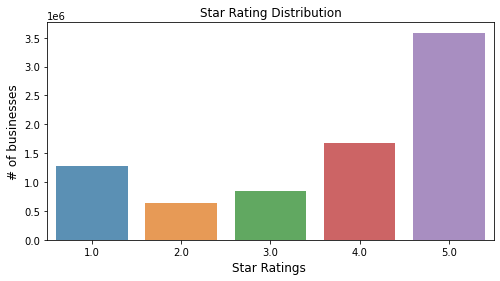

In [27]:
x=review['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution With the full Before Subseting")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

I wanted to only use a subset of the data, but bvbefore I did I wanted to check the difference in the distribution to see if there would be an impact after removing many rows from the review

In [28]:
reviews = []
with open('yelp_academic_dataset_review.json',encoding='utf-8') as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= 200000:
            break
df_rev = pd.DataFrame(reviews)
df_rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


Text(0.5, 0, 'Star Ratings ')

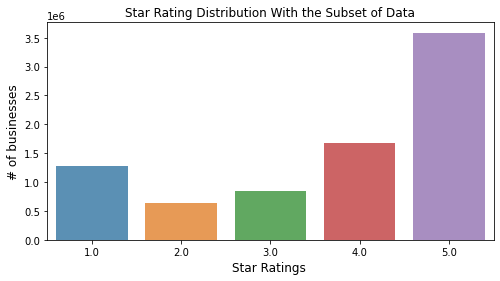

In [29]:
x=review['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution With the Subset of Data")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

In [30]:
review=df_rev[['stars','text']]

review.head()

,stars,text
0,2.0,"As someone who has worked with many museums, I..."
1,1.0,I am actually horrified this place is still in...
2,5.0,I love Deagan's. I do. I really do. The atmosp...
3,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,4.0,"Oh happy day, finally have a Canes near my cas..."


In [32]:
#notice how much we save on memory 
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   stars   200000 non-null  float64
 1   text    200000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.1+ MB
